In [60]:
import numpy as np
import pandas as pd

# Load historical inventory data
try:
    df_store = pd.read_excel('E:\Training\Data\Data Engineer DEPI\Technical\Final Project\data\BikeStore.xlsx', sheet_name='sales stores')
    df_staff = pd.read_excel('E:\Training\Data\Data Engineer DEPI\Technical\Final Project\data\BikeStore.xlsx', sheet_name='sales staffs')
    df_orders = pd.read_excel('E:\Training\Data\Data Engineer DEPI\Technical\Final Project\data\BikeStore.xlsx', sheet_name='sales orders')
    df_order_items = pd.read_excel('E:\Training\Data\Data Engineer DEPI\Technical\Final Project\data\BikeStore.xlsx', sheet_name='sales order_items')
    df_customers = pd.read_excel('E:\Training\Data\Data Engineer DEPI\Technical\Final Project\data\BikeStore.xlsx', sheet_name='sales customers')
    df_stocks = pd.read_excel('E:\Training\Data\Data Engineer DEPI\Technical\Final Project\data\BikeStore.xlsx', sheet_name='production stocks')
    df_product = pd.read_excel('E:\Training\Data\Data Engineer DEPI\Technical\Final Project\data\BikeStore.xlsx', sheet_name='production products')
    df_categories = pd.read_excel('E:\Training\Data\Data Engineer DEPI\Technical\Final Project\data\BikeStore.xlsx', sheet_name='production categories')
    df_brand = pd.read_excel('E:\Training\Data\Data Engineer DEPI\Technical\Final Project\data\BikeStore.xlsx', sheet_name='production brands')

    # Clean and preprocess the data
    df_orders['order_date'] = pd.to_datetime(df_orders['order_date'], errors='coerce')
    df_orders.dropna(subset=['order_date'], inplace=True)

except Exception as e:
    print("Error loading data:", e)


In [61]:
df_store.head()

store_id        store_name           phone                 email  \
0         1  Santa Cruz Bikes  (831) 476-4321  santacruz@bikes.shop   
1         2     Baldwin Bikes  (516) 379-8888    baldwin@bikes.shop   
2         3     Rowlett Bikes  (972) 530-5555    rowlett@bikes.shop   

                street        city state  zip_code  
0   3700 Portola Drive  Santa Cruz    CA     95060  
1   4200 Chestnut Lane     Baldwin    NY     11432  
2  8000 Fairway Avenue     Rowlett    TX     75088

In [9]:
df_staff.head()

staff_id first_name last_name                       email           phone  \
0         1    Fabiola   Jackson  fabiola.jackson@bikes.shop  (831) 555-5554   
1         2     Mireya  Copeland  mireya.copeland@bikes.shop  (831) 555-5555   
2         3      Genna   Serrano    genna.serrano@bikes.shop  (831) 555-5556   
3         4     Virgie   Wiggins   virgie.wiggins@bikes.shop  (831) 555-5557   
4         5   Jannette     David   jannette.david@bikes.shop  (516) 379-4444   

   active  store_id  manager_id  
0       1         1         NaN  
1       1         1         1.0  
2       1         1         2.0  
3       1         1         2.0  
4       1         2         1.0

In [10]:
df_orders.head()

order_id  customer_id  order_status  order_date required_date shipped_date  \
0         1          259             4  2016-01-01    2016-01-03   2016-01-03   
1         2         1212             4  2016-01-01    2016-01-04   2016-01-03   
2         3          523             4  2016-01-02    2016-01-05   2016-01-03   
3         4          175             4  2016-01-03    2016-01-04   2016-01-05   
4         5         1324             4  2016-01-03    2016-01-06   2016-01-06   

   store_id  staff_id  
0         1         2  
1         2         6  
2         2         7  
3         1         3  
4         2         6

In [11]:
df_order_items.head()

order_id  item_id  product_id  quantity  list_price  discount
0         1        1          20         1      599.99      0.20
1         1        2           8         2     1799.99      0.07
2         1        3          10         2     1549.00      0.05
3         1        4          16         2      599.99      0.05
4         1        5           4         1     2899.99      0.20

In [12]:
df_customers.head()

customer_id  first_name last_name           phone                    email  \
0            1       Debra     Burks             NaN    debra.burks@yahoo.com   
1            2       Kasha      Todd             NaN     kasha.todd@yahoo.com   
2            3      Tameka    Fisher             NaN    tameka.fisher@aol.com   
3            4       Daryl    Spence             NaN     daryl.spence@aol.com   
4            5  Charolette      Rice  (916) 381-6003  charolette.rice@msn.com   

                  street           city state  zip_code  
0      9273 Thorne Ave.    Orchard Park    NY     14127  
1       910 Vine Street        Campbell    CA     95008  
2  769C Honey Creek St.   Redondo Beach    CA     90278  
3        988 Pearl Lane       Uniondale    NY     11553  
4         107 River Dr.      Sacramento    CA     95820

In [13]:
df_stocks.head()

store_id  product_id  quantity
0         1           1        27
1         1           2         5
2         1           3         6
3         1           4        23
4         1           5        22

In [14]:
df_product.head()

product_id                        product_name  brand_id  category_id  \
0           1                     Trek 820 - 2016         9            6   
1           2  Ritchey Timberwolf Frameset - 2016         5            6   
2           3     Surly Wednesday Frameset - 2016         8            6   
3           4            Trek Fuel EX 8 29 - 2016         9            6   
4           5        Heller Shagamaw Frame - 2016         3            6   

   model_year  list_price  
0        2016      379.99  
1        2016      749.99  
2        2016      999.99  
3        2016     2899.99  
4        2016     1320.99

In [15]:
df_categories.head()

category_id        category_name
0            1    Children Bicycles
1            2     Comfort Bicycles
2            3    Cruisers Bicycles
3            4  Cyclocross Bicycles
4            5       Electric Bikes

In [16]:
df_brand.head()

brand_id   brand_name
0         1      Electra
1         2         Haro
2         3       Heller
3         4  Pure Cycles
4         5      Ritchey

In [17]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_id    3 non-null      int64 
 1   store_name  3 non-null      object
 2   phone       3 non-null      object
 3   email       3 non-null      object
 4   street      3 non-null      object
 5   city        3 non-null      object
 6   state       3 non-null      object
 7   zip_code    3 non-null      int64 
dtypes: int64(2), object(6)
memory usage: 320.0+ bytes


In [18]:
df_store.describe(include='all').T

count unique                   top freq          mean  \
store_id     3.0    NaN                   NaN  NaN           2.0   
store_name     3      3      Santa Cruz Bikes    1           NaN   
phone          3      3        (831) 476-4321    1           NaN   
email          3      3  santacruz@bikes.shop    1           NaN   
street         3      3    3700 Portola Drive    1           NaN   
city           3      3            Santa Cruz    1           NaN   
state          3      3                    CA    1           NaN   
zip_code     3.0    NaN                   NaN  NaN  60526.666667   

                     std      min      25%      50%      75%      max  
store_id             1.0      1.0      1.5      2.0      2.5      3.0  
store_name           NaN      NaN      NaN      NaN      NaN      NaN  
phone                NaN      NaN      NaN      NaN      NaN      NaN  
email                NaN      NaN      NaN      NaN      NaN      NaN  
street               NaN      NaN      NaN      NaN      NaN      NaN  
city                 NaN      NaN      NaN      NaN      NaN      NaN  
state                NaN      NaN      NaN      NaN      NaN      NaN  
zip_code    43674.190517  11432.0  43260.0  75088.0  85074.0  95060.0

In [19]:
df_store.isna().sum().sum()

0

In [20]:
df_store.duplicated().sum()

0

In [21]:
df_staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   staff_id    10 non-null     int64  
 1   first_name  10 non-null     object 
 2   last_name   10 non-null     object 
 3   email       10 non-null     object 
 4   phone       10 non-null     object 
 5   active      10 non-null     int64  
 6   store_id    10 non-null     int64  
 7   manager_id  9 non-null      float64
dtypes: float64(1), int64(3), object(4)
memory usage: 768.0+ bytes


In [22]:
df_staff.describe(include='all').T

count unique                         top freq      mean       std  \
staff_id    10.0    NaN                         NaN  NaN       5.5   3.02765   
first_name    10     10                     Fabiola    1       NaN       NaN   
last_name     10     10                     Jackson    1       NaN       NaN   
email         10     10  fabiola.jackson@bikes.shop    1       NaN       NaN   
phone         10     10              (831) 555-5554    1       NaN       NaN   
active      10.0    NaN                         NaN  NaN       1.0       0.0   
store_id    10.0    NaN                         NaN  NaN       1.9  0.875595   
manager_id   9.0    NaN                         NaN  NaN  3.444444  2.554952   

            min   25%  50%   75%   max  
staff_id    1.0  3.25  5.5  7.75  10.0  
first_name  NaN   NaN  NaN   NaN   NaN  
last_name   NaN   NaN  NaN   NaN   NaN  
email       NaN   NaN  NaN   NaN   NaN  
phone       NaN   NaN  NaN   NaN   NaN  
active      1.0   1.0  1.0   1.0   1.0  
store_id    1.0   1.0  2.0  2.75   3.0  
manager_id  1.0   1.0  2.0   5.0   7.0

In [23]:
df_staff.isnull().sum().sum()

1

In [24]:
df_staff.fillna(0, inplace=True)
df_staff.isnull().sum().sum()

0

In [25]:
df_staff.duplicated().sum()

0

In [26]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1615 non-null   int64         
 1   customer_id    1615 non-null   int64         
 2   order_status   1615 non-null   int64         
 3   order_date     1615 non-null   object        
 4   required_date  1615 non-null   datetime64[ns]
 5   shipped_date   1445 non-null   datetime64[ns]
 6   store_id       1615 non-null   int64         
 7   staff_id       1615 non-null   int64         
dtypes: datetime64[ns](2), int64(5), object(1)
memory usage: 101.1+ KB


In [27]:
df_orders.describe(include='all').T

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15512\2413700895.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_orders.describe(include='all').T
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15512\2413700895.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_orders.describe(include='all').T


count unique        top freq      first       last  \
order_id       1615.0    NaN        NaT  NaN        NaT        NaT   
customer_id    1615.0    NaN        NaT  NaN        NaT        NaT   
order_status   1615.0    NaN        NaT  NaN        NaT        NaT   
order_date       1615    725 2018-04-17    9        NaT        NaT   
required_date    1615    734 2018-04-17    9 2016-01-03 2018-12-28   
shipped_date     1445    675 2017-10-29    8 2016-01-03 2018-04-02   
store_id       1615.0    NaN        NaT  NaN        NaT        NaT   
staff_id       1615.0    NaN        NaT  NaN        NaT        NaT   

                     mean         std  min    25%    50%     75%     max  
order_id            808.0  466.354658  1.0  404.5  808.0  1211.5  1615.0  
customer_id    654.171517  443.229967  1.0  237.0  638.0  1041.5  1445.0  
order_status     3.778947     0.69343  1.0    4.0    4.0     4.0     4.0  
order_date            NaN         NaN  NaN    NaN    NaN     NaN     NaN  
required_date         NaN         NaN  NaN    NaN    NaN     NaN     NaN  
shipped_date          NaN         NaN  NaN    NaN    NaN     NaN     NaN  
store_id          1.89226    0.558395  1.0    2.0    2.0     2.0     3.0  
staff_id         5.855108    1.913899  2.0    6.0    6.0     7.0     9.0

In [28]:
df_orders.isnull().sum().sum()

170

In [29]:
orders_null = df_orders[df_orders.isnull().any(axis=1)]

In [30]:
orders_null

order_id  customer_id  order_status  order_date required_date  \
69          70           50             3  2016-02-11    2016-02-11   
75          76            9             3  2016-02-16    2016-02-16   
157        158          117             3  2016-04-04    2016-04-04   
184        185           24             3  2016-04-20    2016-04-20   
238        239           13             3  2016-05-27    2016-05-27   
...        ...          ...           ...         ...           ...   
1610      1611            6             3  2018-09-06    2018-09-06   
1611      1612            3             3  2018-10-21    2018-10-21   
1612      1613            1             3  2018-11-18    2018-11-18   
1613      1614          135             3  2018-11-28    2018-11-28   
1614      1615          136             3  2018-12-28    2018-12-28   

     shipped_date  store_id  staff_id  
69            NaT         3         9  
75            NaT         2         6  
157           NaT         3         9  
184           NaT         1         2  
238           NaT         3         9  
...           ...       ...       ...  
1610          NaT         2         7  
1611          NaT         1         3  
1612          NaT         2         6  
1613          NaT         3         8  
1614          NaT         3         8  

[170 rows x 8 columns]

In [31]:
df_orders.duplicated().sum()

0

In [32]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4722 entries, 0 to 4721
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    4722 non-null   int64  
 1   item_id     4722 non-null   int64  
 2   product_id  4722 non-null   int64  
 3   quantity    4722 non-null   int64  
 4   list_price  4722 non-null   float64
 5   discount    4722 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 221.5 KB


In [33]:
df_order_items.describe(include='all').T

count         mean          std    min     25%      50%     75%  \
order_id    4722.0   821.265354   465.152168   1.00  423.25  828.500  1226.0   
item_id     4722.0     2.262601     1.199129   1.00    1.00    2.000     3.0   
product_id  4722.0    59.366158    67.312708   2.00   14.00   28.000    84.0   
quantity    4722.0     1.498941     0.500052   1.00    1.00    1.000     2.0   
list_price  4722.0  1212.707872  1352.798257  89.99  429.00  599.990  1549.0   
discount    4722.0     0.105373     0.058119   0.05    0.05    0.085     0.2   

                 max  
order_id     1615.00  
item_id         5.00  
product_id    315.00  
quantity        2.00  
list_price  11999.99  
discount        0.20

In [34]:
df_order_items.isnull().sum().sum()

0

In [35]:
df_order_items.duplicated().sum()

0

In [36]:
# Merge the DataFrames on 'store_id'
df_merged = pd.merge(df_staff, df_store, on='store_id', how='inner')

# Display the merged DataFrame
df_merged


staff_id  first_name last_name                        email_x  \
0         1     Fabiola   Jackson     fabiola.jackson@bikes.shop   
1         2      Mireya  Copeland     mireya.copeland@bikes.shop   
2         3       Genna   Serrano       genna.serrano@bikes.shop   
3         4      Virgie   Wiggins      virgie.wiggins@bikes.shop   
4         5    Jannette     David      jannette.david@bikes.shop   
5         6   Marcelene     Boyer     marcelene.boyer@bikes.shop   
6         7      Venita    Daniel       venita.daniel@bikes.shop   
7         8        Kali    Vargas         kali.vargas@bikes.shop   
8         9       Layla   Terrell       layla.terrell@bikes.shop   
9        10  Bernardine   Houston  bernardine.houston@bikes.shop   

          phone_x  active  store_id  manager_id        store_name  \
0  (831) 555-5554       1         1         0.0  Santa Cruz Bikes   
1  (831) 555-5555       1         1         1.0  Santa Cruz Bikes   
2  (831) 555-5556       1         1         2.0  Santa Cruz Bikes   
3  (831) 555-5557       1         1         2.0  Santa Cruz Bikes   
4  (516) 379-4444       1         2         1.0     Baldwin Bikes   
5  (516) 379-4445       1         2         5.0     Baldwin Bikes   
6  (516) 379-4446       1         2         5.0     Baldwin Bikes   
7  (972) 530-5555       1         3         1.0     Rowlett Bikes   
8  (972) 530-5556       1         3         7.0     Rowlett Bikes   
9  (972) 530-5557       1         3         7.0     Rowlett Bikes   

          phone_y               email_y               street        city  \
0  (831) 476-4321  santacruz@bikes.shop   3700 Portola Drive  Santa Cruz   
1  (831) 476-4321  santacruz@bikes.shop   3700 Portola Drive  Santa Cruz   
2  (831) 476-4321  santacruz@bikes.shop   3700 Portola Drive  Santa Cruz   
3  (831) 476-4321  santacruz@bikes.shop   3700 Portola Drive  Santa Cruz   
4  (516) 379-8888    baldwin@bikes.shop   4200 Chestnut Lane     Baldwin   
5  (516) 379-8888    baldwin@bikes.shop   4200 Chestnut Lane     Baldwin   
6  (516) 379-8888    baldwin@bikes.shop   4200 Chestnut Lane     Baldwin   
7  (972) 530-5555    rowlett@bikes.shop  8000 Fairway Avenue     Rowlett   
8  (972) 530-5555    rowlett@bikes.shop  8000 Fairway Avenue     Rowlett   
9  (972) 530-5555    rowlett@bikes.shop  8000 Fairway Avenue     Rowlett   

  state  zip_code  
0    CA     95060  
1    CA     95060  
2    CA     95060  
3    CA     95060  
4    NY     11432  
5    NY     11432  
6    NY     11432  
7    TX     75088  
8    TX     75088  
9    TX     75088

In [37]:
missing_data = {
    "store": df_store.isnull().sum(),
    "staff": df_staff.isnull().sum(),
    "orders": df_orders.isnull().sum(),
    "order_items": df_order_items.isnull().sum(),
    "customers": df_customers.isnull().sum(),
    "stocks": df_stocks.isnull().sum(),
    "products": df_product.isnull().sum(),
    "categories": df_categories.isnull().sum(),
    "brands": df_brand.isnull().sum(),
}
print(missing_data)

{'store': store_id      0
store_name    0
phone         0
email         0
street        0
city          0
state         0
zip_code      0
dtype: int64, 'staff': staff_id      0
first_name    0
last_name     0
email         0
phone         0
active        0
store_id      0
manager_id    0
dtype: int64, 'orders': order_id           0
customer_id        0
order_status       0
order_date         0
required_date      0
shipped_date     170
store_id           0
staff_id           0
dtype: int64, 'order_items': order_id      0
item_id       0
product_id    0
quantity      0
list_price    0
discount      0
dtype: int64, 'customers': customer_id       0
first_name        0
last_name         0
phone          1267
email             0
street            0
city              0
state             0
zip_code          0
dtype: int64, 'stocks': store_id      0
product_id    0
quantity      0
dtype: int64, 'products': product_id      0
product_name    0
brand_id        0
category_id     0
model_year      0

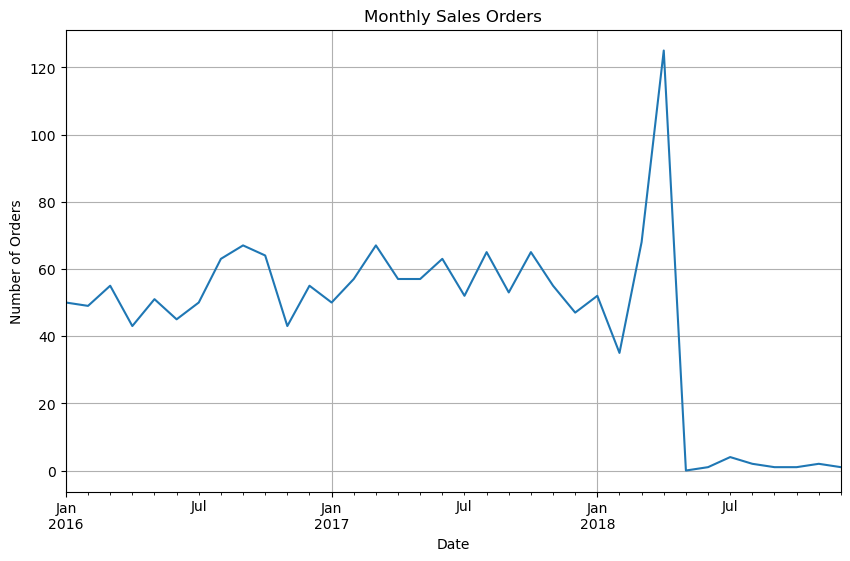

In [38]:
df_orders['order_date'] = pd.to_datetime(df_orders['order_date'])
df_orders.set_index('order_date', inplace=True)

# Resample orders by month to see trends
monthly_orders = df_orders.resample('M').size()

# Plot monthly sales orders
plt.figure(figsize=(10, 6))
monthly_orders.plot()
plt.title('Monthly Sales Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

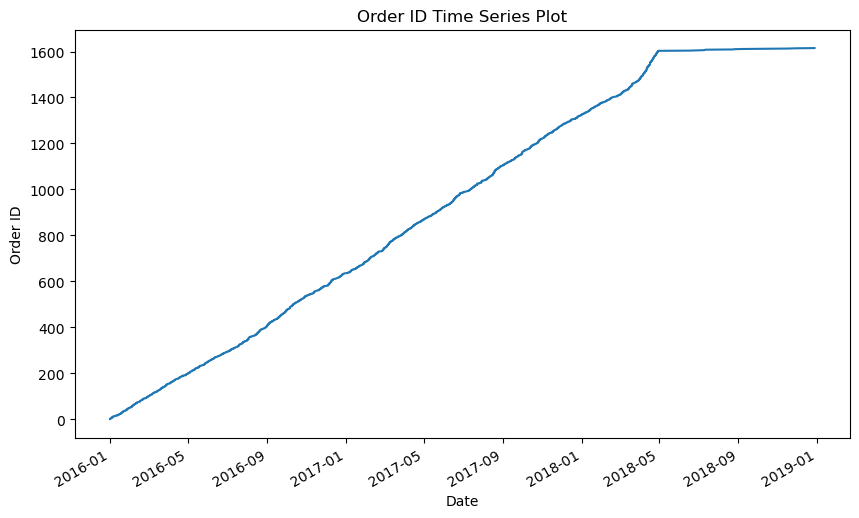

In [39]:
df_orders['order_id'].plot(figsize=(10, 6), title='Order ID Time Series Plot', xlabel='Date', ylabel='Order ID')
plt.show()

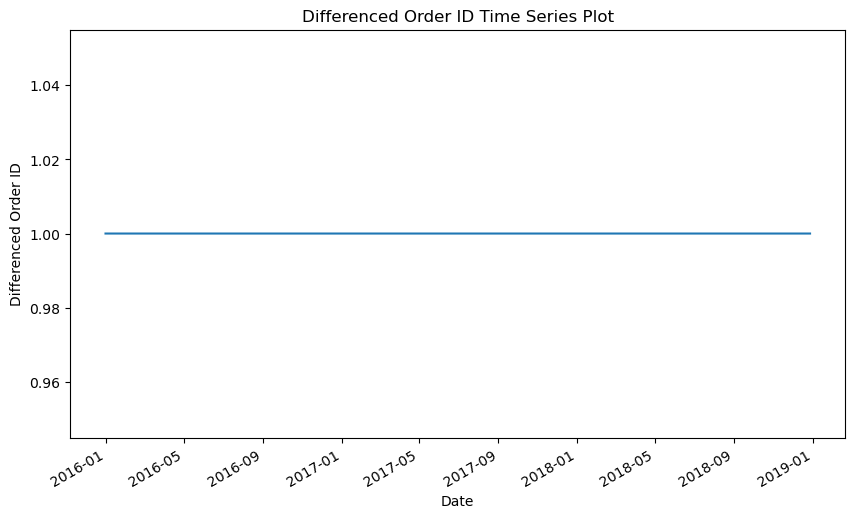

In [41]:
df_orders['order_id'].diff().dropna().plot(figsize=(10, 6), title='Differenced Order ID Time Series Plot', xlabel='Date', ylabel='Differenced Order ID')
plt.show()


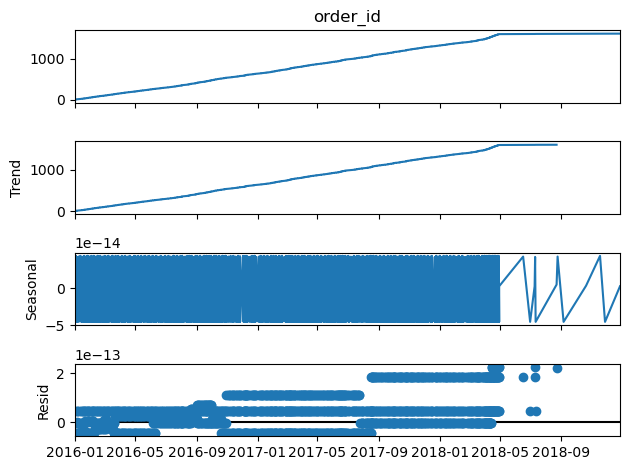

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_orders['order_id'], model='additive', period=12)
decomposition.plot()
plt.show()


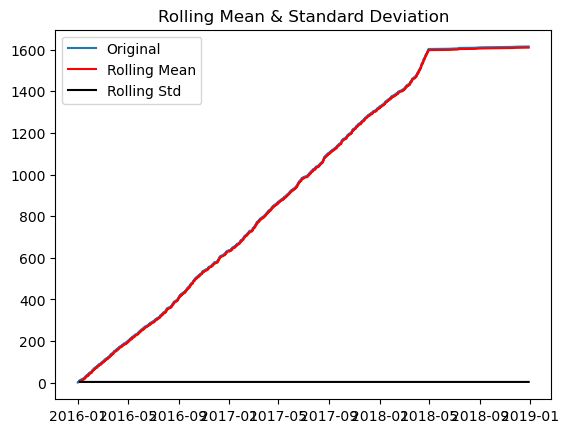

In [43]:
rolmean = df_orders['order_id'].rolling(window=12).mean()
rolstd = df_orders['order_id'].rolling(window=12).std()

plt.plot(df_orders['order_id'], label='Original')
plt.plot(rolmean, label='Rolling Mean', color='red')
plt.plot(rolstd, label='Rolling Std', color='black')
plt.title('Rolling Mean & Standard Deviation')
plt.legend(loc='best')
plt.show()


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given wit

Error fitting ARIMA model: Found input variables with inconsistent numbers of samples: [0, 1]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with

Error fitting Exponential Smoothing model: Found input variables with inconsistent numbers of samples: [0, 1]


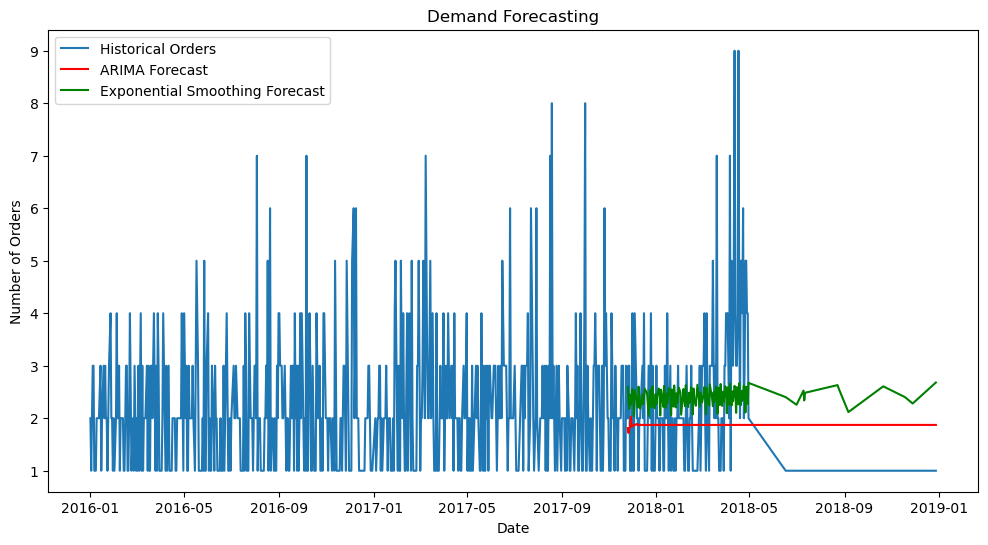

In [49]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Prepare the data for forecasting (grouping by date)
df_orders['order_date'] = df_orders['order_date'].dt.date
daily_orders = df_orders.groupby('order_date').size()

# Split data into train and test sets
train_size = int(len(daily_orders) * 0.8)
train, test = daily_orders[:train_size], daily_orders[train_size:]

# Cross-validation function
def time_series_cv(model_class, train_data, steps=12):
    errors = []
    for i in range(steps):
        train_cv, test_cv = train_data[:-steps+i], train_data[-steps+i:-steps+i+1]
        model = model_class(train_cv)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=1)
        errors.append(mean_absolute_error(test_cv, forecast))
    return np.mean(errors)

# Fit ARIMA model
try:
    arima_order = (5, 1, 0)  # Adjust as necessary
    arima_model = ARIMA(train, order=arima_order)
    arima_fit = arima_model.fit()
    arima_forecast = arima_fit.forecast(steps=len(test))

    # Cross-validation for ARIMA
    arima_cv_error = time_series_cv(lambda x: ARIMA(x, order=arima_order), train)
    print(f"Cross-validated MAE for ARIMA: {arima_cv_error}")

except Exception as e:
    print("Error fitting ARIMA model:", e)

# Fit Exponential Smoothing model
try:
    exp_smoothing_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
    exp_smoothing_fit = exp_smoothing_model.fit()
    exp_smoothing_forecast = exp_smoothing_fit.forecast(steps=len(test))

    # Cross-validation for Exponential Smoothing
    es_cv_error = time_series_cv(lambda x: ExponentialSmoothing(x, trend='add', seasonal='add', seasonal_periods=12), train)
    print(f"Cross-validated MAE for Exponential Smoothing: {es_cv_error}")

except Exception as e:
    print("Error fitting Exponential Smoothing model:", e)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(daily_orders.index, daily_orders.values, label='Historical Orders')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
plt.plot(test.index, exp_smoothing_forecast, label='Exponential Smoothing Forecast', color='green')
plt.title('Demand Forecasting')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.show()


ARIMA - MAE: 1.121572708890258, MSE: 2.665611842424919, R²: -0.1262960005422813
Exponential Smoothing - MAE: 1.1655845445580812, MSE: 2.336971078663177, R²: 0.012563968470793774


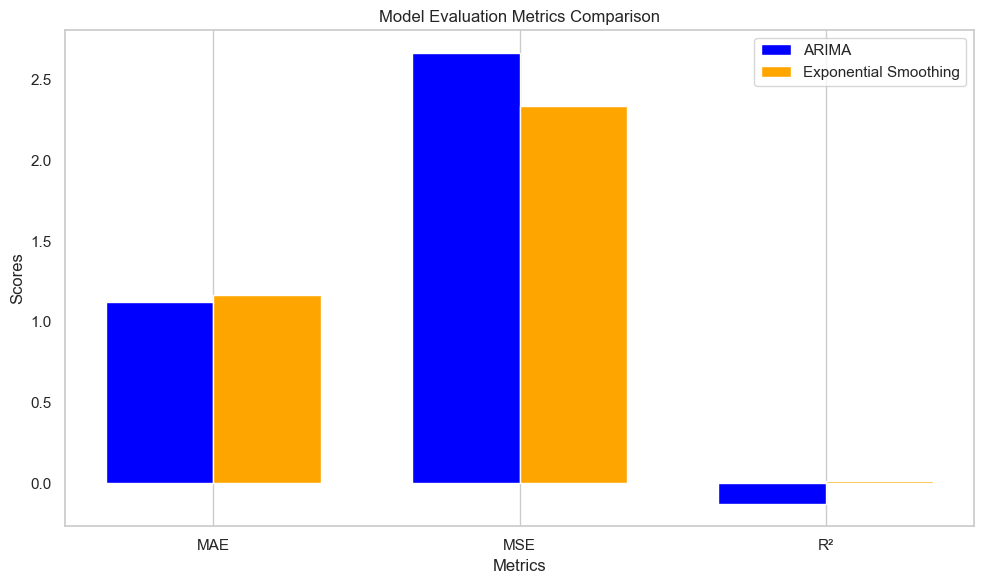

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume we have some actual values for comparison
actual_values = daily_orders[-len(test):]  # Actual values from the test set

# Evaluate the ARIMA model
try:
    mae_arima = mean_absolute_error(actual_values, arima_forecast)
    mse_arima = mean_squared_error(actual_values, arima_forecast)
    r2_arima = r2_score(actual_values, arima_forecast)

    print(f"ARIMA - MAE: {mae_arima}, MSE: {mse_arima}, R²: {r2_arima}")

except Exception as e:
    print("Error evaluating ARIMA model:", e)

# Evaluate the Exponential Smoothing model
try:
    mae_es = mean_absolute_error(actual_values, exp_smoothing_forecast)
    mse_es = mean_squared_error(actual_values, exp_smoothing_forecast)
    r2_es = r2_score(actual_values, exp_smoothing_forecast)

    print(f"Exponential Smoothing - MAE: {mae_es}, MSE: {mse_es}, R²: {r2_es}")

except Exception as e:
    print("Error evaluating Exponential Smoothing model:", e)

# Prepare data for plotting
metrics = ['MAE', 'MSE', 'R²']
arima_scores = [mae_arima, mse_arima, r2_arima]
es_scores = [mae_es, mse_es, r2_es]

# Bar width
bar_width = 0.35
x = np.arange(len(metrics))

# Create bar plots
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, arima_scores, width=bar_width, label='ARIMA', color='blue')
plt.bar(x + bar_width/2, es_scores, width=bar_width, label='Exponential Smoothing', color='orange')

# Add labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics Comparison')
plt.xticks(x, metrics)
plt.legend()

# Show the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


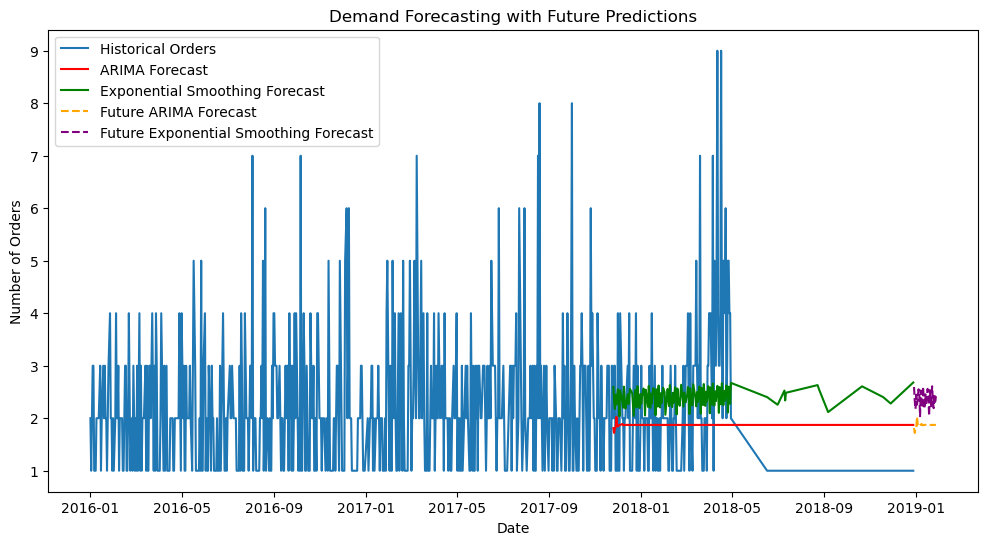

In [51]:
# Part 4: Testing the Forecast Models
# Use the forecasts to predict future orders
future_steps = 30  # Define how many days you want to predict
try:
    future_arima_forecast = arima_fit.forecast(steps=future_steps)
    future_exp_smoothing_forecast = exp_smoothing_fit.forecast(steps=future_steps)

    # Create a date range for future predictions
    future_dates = pd.date_range(start=daily_orders.index[-1] + pd.Timedelta(days=1), periods=future_steps)

    # Plot future forecasts
    plt.figure(figsize=(12, 6))
    plt.plot(daily_orders.index, daily_orders.values, label='Historical Orders')
    plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
    plt.plot(test.index, exp_smoothing_forecast, label='Exponential Smoothing Forecast', color='green')
    plt.plot(future_dates, future_arima_forecast, label='Future ARIMA Forecast', linestyle='--', color='orange')
    plt.plot(future_dates, future_exp_smoothing_forecast, label='Future Exponential Smoothing Forecast', linestyle='--', color='purple')
    plt.title('Demand Forecasting with Future Predictions')
    plt.xlabel('Date')
    plt.ylabel('Number of Orders')
    plt.legend()
    plt.show()

except Exception as e:
    print("Error predicting future orders:", e)

In [74]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Set the number of future periods you want to forecast (e.g., next 12 days)
future_steps = 12

# Merge df_order_items with df_orders to associate order dates with products
df_merged = pd.merge(
    df_order_items,
    df_orders[['order_id', 'order_date']],
    on='order_id'
)

# Convert 'order_date' to datetime format
df_merged['order_date'] = pd.to_datetime(df_merged['order_date'], errors='coerce')

# Prepare the data for forecasting (grouping by product and date)
daily_product_demand = df_merged.groupby(['product_id', df_merged['order_date'].dt.date]).size().unstack(fill_value=0)

# Initialize dictionary to store forecasts
product_forecasts = {}

# Fit ARIMA model for each product to forecast future demand
for product_id in daily_product_demand.index:
    try:
        product_demand = daily_product_demand.loc[product_id]
        train_size = int(len(product_demand) * 0.8)
        train = product_demand[:train_size]

        # Fit ARIMA model (adjust order as necessary)
        arima_order = (5, 1, 0)  # ARIMA parameters (p,d,q)
        arima_model = ARIMA(train, order=arima_order)
        arima_fit = arima_model.fit()

        # Forecast future demand
        future_forecast = arima_fit.forecast(steps=future_steps)
        product_forecasts[product_id] = future_forecast

    except Exception as e:
        print(f"Error forecasting for product {product_id}: {e}")

# Convert forecasts to a DataFrame for easier handling
forecast_df = pd.DataFrame(product_forecasts)

# Calculate the total forecast demand for all products
total_forecast_demand = forecast_df.sum(axis=0)

# Calculate percentage of demand for each product
percentage_demand = (forecast_df.div(total_forecast_demand, axis=1)) * 100

# Prepare the output DataFrame with product IDs and their forecasted percentage demand
output = pd.DataFrame({
    'product_id': forecast_df.columns,
    'percentage_demand': percentage_demand.mean(axis=0)  # Average percentage across the forecast period
})

# Sort the output by percentage of demand
output_sorted = output.sort_values(by='percentage_demand', ascending=False)

# Print the results
print(output_sorted)

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given wit

     product_id  percentage_demand
87           87           8.333333
97           97           8.333333
20           20           8.333333
32           32           8.333333
71           71           8.333333
..          ...                ...
311         311                NaN
312         312                NaN
313         313                NaN
314         314                NaN
315         315                NaN

[307 rows x 2 columns]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


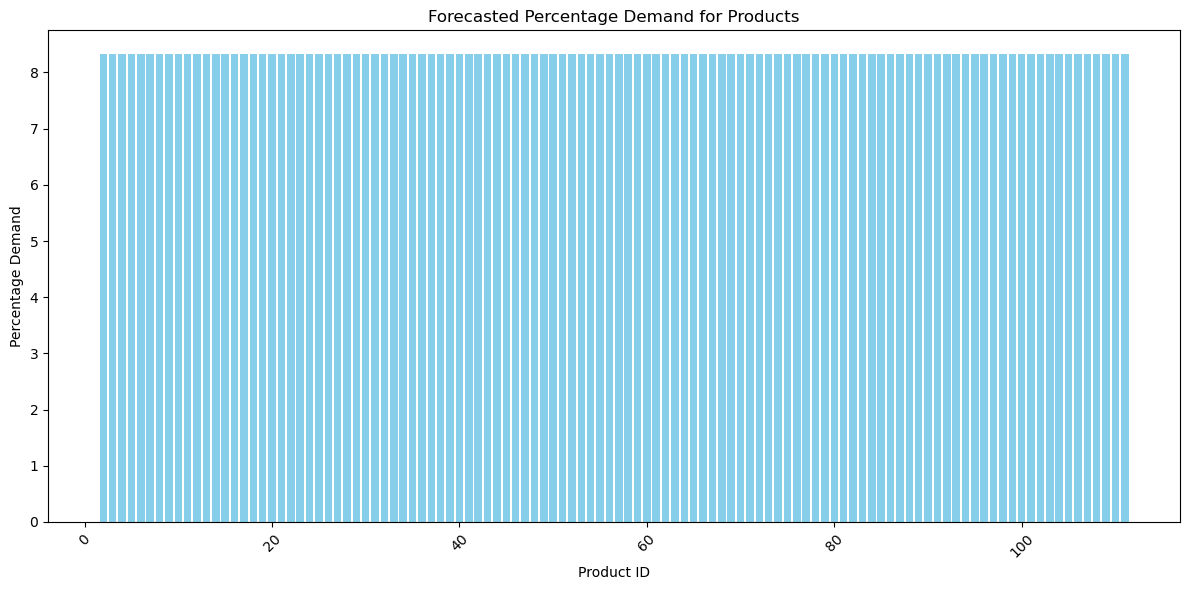

In [76]:
# Plotting the forecasted percentage demand
plt.figure(figsize=(12, 6))
plt.bar(output_sorted['product_id'], output_sorted['percentage_demand'], color='skyblue')
plt.xlabel('Product ID')
plt.ylabel('Percentage Demand')
plt.title('Forecasted Percentage Demand for Products')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

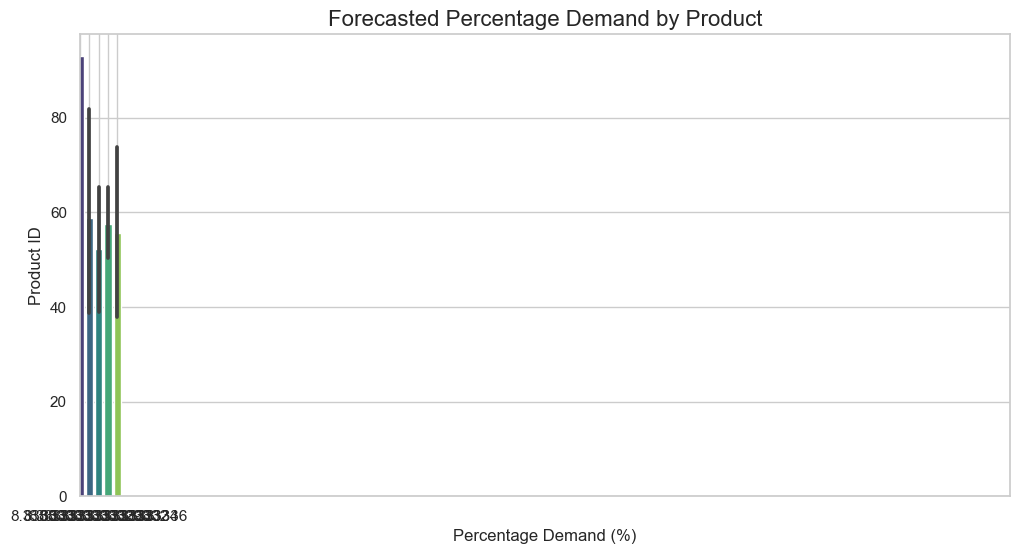

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot for the percentage of demand for each product
plt.figure(figsize=(12, 6))
sns.barplot(x='percentage_demand', y='product_id', data=output_sorted, palette='viridis')

# Adding titles and labels
plt.title('Forecasted Percentage Demand by Product', fontsize=16)
plt.xlabel('Percentage Demand (%)', fontsize=12)
plt.ylabel('Product ID', fontsize=12)
plt.xlim(0, 100)  # Adjust x-axis limit for better visualization
plt.grid(axis='x')

# Show the plot
plt.show()


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given wit

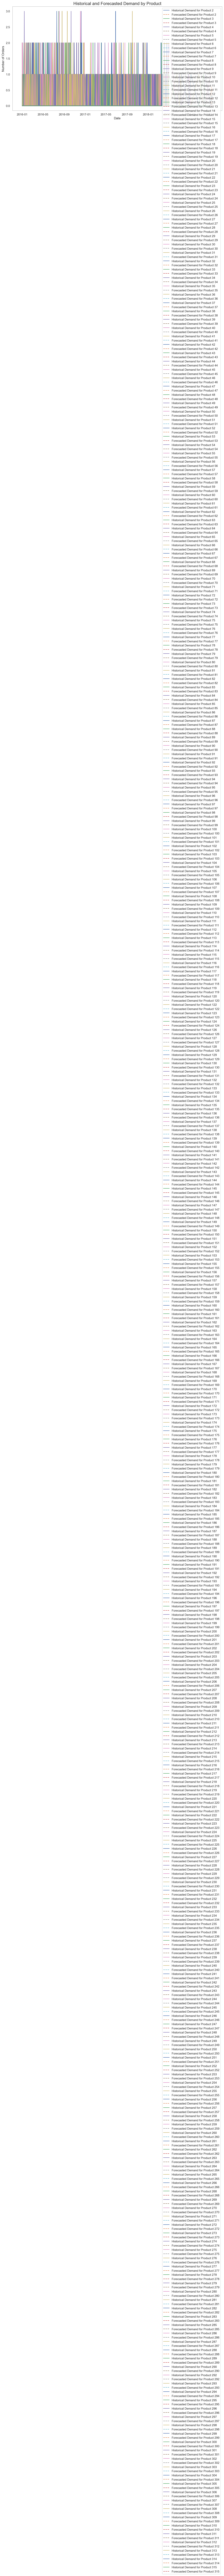

In [78]:
# Prepare the data for visualization
plt.figure(figsize=(14, 7))

for product_id in daily_product_demand.index:
    try:
        product_demand = daily_product_demand.loc[product_id]
        train_size = int(len(product_demand) * 0.8)
        train = product_demand[:train_size]

        # Fit ARIMA model
        arima_model = ARIMA(train, order=arima_order)
        arima_fit = arima_model.fit()

        # Forecast future demand
        future_forecast = arima_fit.forecast(steps=future_steps)

        # Create a time index for future steps
        future_index = pd.date_range(start=product_demand.index[-1] + pd.Timedelta(days=1), periods=future_steps)

        # Plot historical and forecasted demand
        plt.plot(product_demand.index, product_demand, label=f'Historical Demand for Product {product_id}')
        plt.plot(future_index, future_forecast, label=f'Forecasted Demand for Product {product_id}', linestyle='--')

    except Exception as e:
        print(f"Error forecasting for product {product_id}: {e}")

# Adding titles and labels
plt.title('Historical and Forecasted Demand by Product', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.legend()
plt.grid()
plt.show()


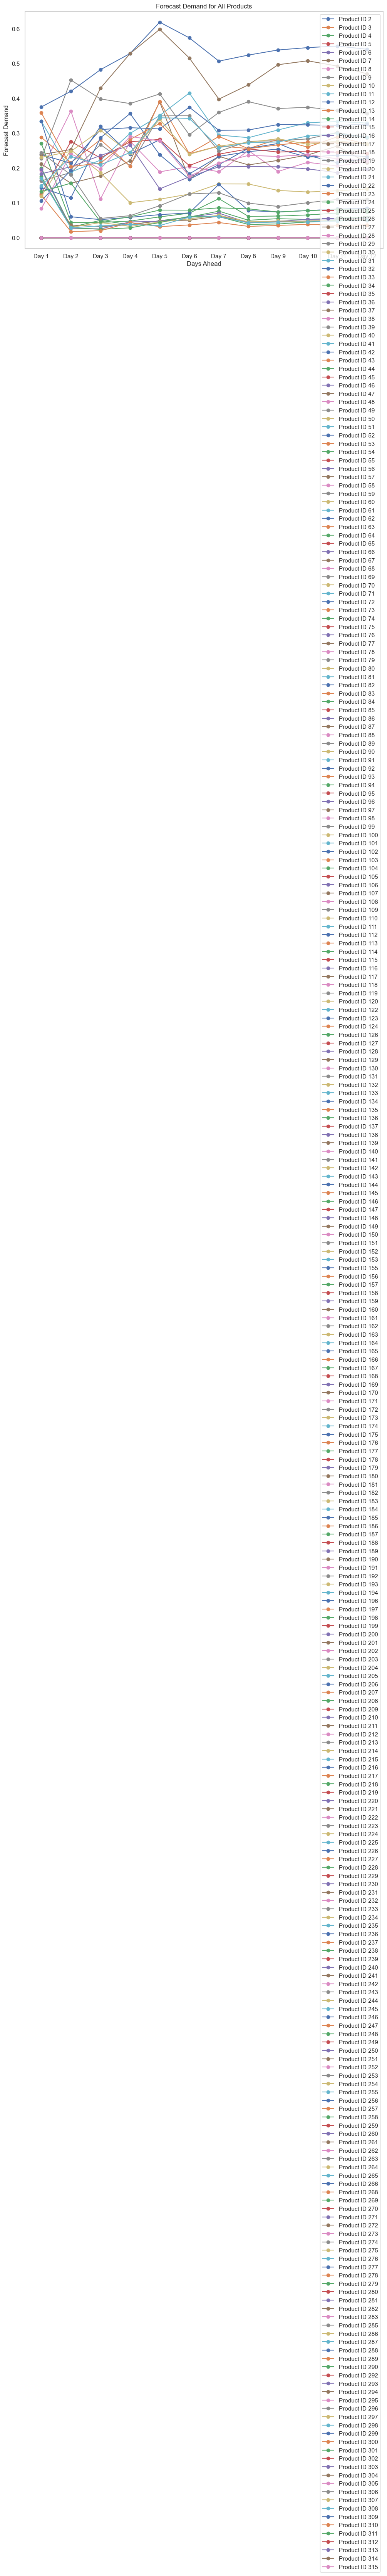

In [87]:
# Create a line plot for all product forecasts
plt.figure(figsize=(12, 8))

for product_id in forecast_df.columns:
    plt.plot(range(len(forecast_df[product_id])), forecast_df[product_id], marker='o', label=f'Product ID {product_id}')

plt.title('Forecast Demand for All Products')
plt.xlabel('Days Ahead')
plt.ylabel('Forecast Demand')
plt.xticks(range(future_steps), [f'Day {i+1}' for i in range(future_steps)])
plt.legend()
plt.grid()
plt.show()
